# Flight Delays and Twitter Sentiment

DATA 512 Ethics Final Project

Fall 2018

Date: December 9th, 2018

**Analysis and report prepared by: Ryan Bae**

## Introduction

Every day, more than a million people take to the skies to travel in the United States. Far removed from the golden age of flying in the 1960s, air travel today mainly conjures up memories of flight delays, rude customers, and long lies at the airport.

Delays are an unavoidable part of flying. Many delays occur due to weather and other events outside anyone's control, while others occur because of mismanagement by airlines/airports or the flight crew. Quantifying this would be an interesting exercise; which airlines are most commonly delayed? Which airports? Are certain routes most susceptible to delays? What about cancellations?

Regardless of the reasons for delays, passengers often vent their frustration of air travel on various social media mediums,  Twitter being a prominent example. While this is a popular pastime for many people, one can't help but wonder how grounded in reality people's tweets about airlines are. Are the negative (or positive) sentiments about an airline reflective of its on-time performance?

The goal of this project is to characterize causes of flight delays in the United States and identify most commonly delayed airlines, flights, airports, and routes in 2015. Second part of this project is an analysis of the Twitter sentiment of various airlines in the month of February, 2015. Positive and negative sentiments on Twitter are to be characterized and compared with on-time performance of each airline to see if they are reflective of reality. 

## Related Work

The US Bureau of Transportation Statistics publishes the flight delays and cancellations data annually. In addition with data publication, they perform some basic analysis at the aggregate level for the air transportation industry as a whole, which is posted on their website [here](https://www.bts.gov/topics/airlines-and-airports-0). They also have a dashboard which users can query for specific airlines and airports for their on-time statistics in the same website. However, none of these analyses contain any kind of comparison with sentiment on social media. 

## Methods

The analysis falls into 2 board verticals. First is the characterization of flight delays, and second is the comparison between airline on-time performance and Twitter sentiment. 

The end user for this analysis is meant to be an airline passenger, airline worker/pilot, or a general aviation enthusiast with little technicial backgroud. Therefore, one important human-centered consideration that went into communicating the results from this analysis is to keep things simple and clear. Therefore, the analysis focuses more on visualization and simple statistical modeling rather than complex machine learning models. Various plots and aggregated tables are used to answer the posed research questions and communicate findings from the analysis to a non-technical audience.  

### 1. Characterization of flight delays

The goal of this analysis is to characterize the flight delays in the dataset. Three main research questions are asked:

* What causes flight delays? What proportion is due to airlines, air traffic control, weather, security, etc?


* Are there any seasonal/temporal patterns to flight delays?


* Which airlines/airports/routes are most delayed? Least delayed?


When looking at on-time metrics, **average minutes of delay per flight** is used. To calculate this, the dataset is filtered to desired flights and grouped into airlines/airports/routes/timeframe. It is important to make sure the correct delay time is used for each comparison. The following are used in the analysis:

| Group by metric | Delay type used                 | 
|-----------------|---------------------------------|
| Airline         | Arrival Delay, Airline Delay    |
| Airport/Route   | Arrival Delay, Air System Delay |
| Timeframe       | All types of delays             |

Arrival delay is the overall delay of the flight (arrival time - scheduled arrival time), and is a measure of what the passenger experiences. It is used in all characterizations of flight delays in this analysis. Airline delay is delay specifically due to the airline, and is used only when comparing airline specific performances. Finally, air system delay, which is delay due to air traffic control and airport operations, is used only when comparing airport/route comparisons. For these analysis, only routes with at least 100 flights per year are considered.  

For studying time aspect nature of delays, a 7-day running average of various types of delays are plotted for interpretation and visualization. 7-day running average is a good balance between reducing noise using a meaningful and interpretable window (there's variations in flights during each day of a week) and using a timeframe that is too large. Also a weekly average is more interpretable and simpler to understand for the end user of this analysis. 

### 2. Airline on-time performance and passenger Tweet sentiment comparison

For this portion of the analysis, the following research questions are asked:

* Which airlines have most negative/positive sentiment on Twitter? How do these sentiments compare with their on-time performance?


* What does the above analysis look like when just looking at Tweets that complain about late flights?

Sentiment for each Tweet are already classified in the `Tweets.csv` dataset. Simple groupby aggregations are used to calculate sentiment for each airline using an industry popular metric called **Net Promoter Score**, or NPS. NPS is calculated using the following formula:

$$NPS = \% \space positive Tweets - \% \space negative Tweets$$

NPS is not a perfect way of aggregating sentiments (it usually relies on a 5 point scale that is not linear). But because of the human-centered considerations of the non-technical audience, it was chosen for it's simplicity and ability to quantify sentiment in a single number.  

For the second research question, the Twitter data is further filtered to those classified as `late flight` for `negativereason` column. This reduces the Tweets down to just those that complained negatively about an airline being late. And only flights that are late due to the fault of the airline are considered. These flights are defined as being more than an hour late with over half of the delay time due to the fault of the airline (`AIRLINE_DELAY` > `ARRIVAL_DELAY` / 2).

## Findings

The findings from this analysis gave some interesting insights into what causes flight delays and how airlines and airports performed in 2015. 

### 1. Characterization of flight delays

* **What causes flight delays? What proportion is due to airlines, air traffic control, weather, security, etc?**

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/delay_type.PNG?raw=true "Delays types")

By far the most common type of delay is what's called **late aircraft delay**, which is delay due to the previous aircraft being late. But this can be for any of the other reasons, and doesn't tell much about the real causes. Discarding these delays, the rest of the delays are dominated by airline delays and air system delays. Weather delays only accounted for less than 5% of all delayed minutes in 2015, and security delays accouting for mere 0.13%.

* **Are there any seasonal/temporal patterns to flight delays?**

The 7-day time averages of all types of delays are shown in plot below.

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/delays_overtime.png?raw=true "Delays over time")

Most types of delays actually remain fairly constant throughout the year. The overall delay, `ARRIVAL_DELAY` column does show, however, seasonal peaks. They correpond with seasonal peaks in the late aircraft delay. What about day of the week? Do average flight delays vary between days of the week?

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/day_of_week.png?raw=true)

As it turns out, weekends, especially saturdays, are the worst days to fly in terms of overall delay. 

* **Which airlines/airports/routes are most delayed? Least delayed?**

Here the most/least delayed routes are shown. Air traffic delay, or the `AIR_SYSTEM_DELAY` column, is aggregated here and averaged per flight. The table below shows the top 10 most delayed routes in 2015 using this metric. 

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/most_delayed_routes.PNG?raw=true)

It's quite remarkable to see Newark airport in so many of the destinations. San Francisco airport tops the list as well. These are all routes that fly into very busy airports, with average air system delay of over 45 minutes! Now what about the least delayed routes in 2015?

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/least_delayed_routes.PNG?raw=true)

Again, there is remarkable similarities between the top 10 least delayed routes, with all the destinations being in Hawaii. In fact, most flights are short hops between Hawaiian Islands. 

Now let's look at airlines:

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/airline_clustering.png?raw=true)

This shows the airline delay per flight on the y-axis and arrival delay per flight on the x-axis. This shows that airlines vary in their overall delays and delays due to their fault. For example, Spirit airlines are late often, but usually not due to their fault. Delta airlines, on the otherhand, are on time more often, but when they are late it is more likely to be their fault than other airlines. The plot also shows that Alaska and Virgin airlines are the least delayed both overall and due to their own fault. 

### 2. Airline on-time performance and passenger Tweet sentiment comparison

First, what do people on Twitter complain about the most when it comes to negative comments about airlines?

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/negative_reasons.png?raw=true)

The most common complaint is customer service. However, late flights comes in at second place, followed by ambiguous complaints and cancelled flights, lost luggage, etc. So late flights are a common source of complaints for people on Twitter. 

* **Which airlines have most negative/positive sentiment on Twitter? How do these sentiments compare with their on-time performance?**

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/twitter_sentiment_arrival_delay.png?raw=true)

The above plot shows little correlation between average minutes of delay per flight (overall) and airline sentiment on Twitter for February 2015. While the correlation coefficient is negative, there is no statisticals significance. Part of this is due to the small sample size (6) of airlines represented. 

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/twitter_sentiment_airline_delay.png?raw=true)

The above plot shows little correlation between average minutes of delay per flight (airline) and airline sentiment on Twitter for February 2015. Again, while the correlation coefficient is negative, there is no statisticals significance, partly due to the small sample size. 

* **What does the above analysis look like when just looking at Tweets that complain about late flights?**

![alt text](https://github.com/ryanbae89/data-512-final-project/blob/master/images/twitter_sentiment2.png?raw=true)

To answer this question, the number of late flights that are the fault of the airline are plotted against the number of Tweets for that airline complaining about late flights. The above plot shows that 

## Discussions/Implicatons

So what does all this mean? Let's start with flight delays characterization. First is that while there is seasonal variation in average overall delay time per flight, it is mainly due to the aircraft arriving late. The other delay factors such as weather, airline, and air traffic are fairly consistant throughout the year. This means the increase in delays during holidays, for example, is largely exacerbated by the increase in number of flights. For what it's worth, airlines and air systems operate with similar efficiencies with increased loads, an interesting finding. 

Regarding airports and routes, it is good to avoid large, busy airports for good on-time performance. In fact, of the three major airports in New York City, two of them made the top 10 list and Newark airport made the list 8 times! It is suggested to avoid these airports when possible. And when picking days to fly, avoid the weekends, especially saturdays, as it is the most delayed day of the week. 

As for the airlines, the plot shows some interesting clusters of airlines. Most airlines, such as Southwest, US Airways, American Eagle, JetBlue, etc have average overall on-time performance with average airline delay performance. Two airlines that most people have good opinions of, Virigin and Alaska, were the most on-time and least delayed due to their own fault. And the ultra low-cost airlines such as Frontier and Spirit airlines had worst overall on-time performance, but per flight airline delays for these airlines were quite good. Some airlines, such as Delta and Hawaiian, had good overall on-time performance that could be improved by doing better on their airline delays. These self-clustering of airlines on the airline comparison visualization was an interesting finding that reflects the different routes, operations, and customers that they serve in the US. 

Now for the Twitter analysis, all findings came negative. There were no statistically significant correlations between airline Twitter sentiment and their on-time performance. Even when only the Tweets that complained about late flights are plotted alongside actual number of late flights, the correlation was poor. However, this comes with few caveats; the number of airlines (the sample size) is very small, at only 6. Also, only a single month of the year was considered, and a more clear pattern may emerge when a wider timeframe is considered. 

The final plot does have, however, some interesting insights about passenger's sentiments about speicfic airlines. Virgin American airlines, an airline with very few late flights and delays, does have fewest number of complaints about late flights on Twitter. US Airways and United, however, has proportionally larger number of complaints about late flights than airlines like Delta and American. And surprisingly, Southwest airlines, while having the most late flights that are their fault, received second least number of late flight complaints on Twitter. These data points suggest that people's complaints and sentiments about airlines are not very reflective of reality, at least when it comes to their on-time performance except in exceptional cases, such as Virgin airlines. 

**Limitations**

As mentioned above, there are several limitations to this study. First is the limited timeframe of the Twitter data (only February 2015) as well as the small number of airlines classified (only 6). 

In addition, some important characteristics about the airport are also missing. They can include things like number of flights and human traffic for an given airport, number of runways, etc that may all contribute to number of delayed flights. 


## Conclusions

Overall, this analysis was an interesting exercise into the world of commercial aviation and Twitter. There were some interesting insights about causes of flight delays and best/worst performing airlines and airports. While most of the findings confirmed suspicions, such as large airports like Newark being the worst at air system delays, others were more surprising. They include variations between airlines in their overall on-time performance and airline delay performance. The Twitter sentiment analysis, while ultimately a negative result, comes with a caveat of small sample size of airlines and timeframe. This means further work in this area can provide more conclusive insights. Finally, the over complaints of airlines like United and under complaints of airlines like Southwest was an interesting insight, although not too unexpected based on my own anecdotal experience. My hope is that both those who work in commercial aviation and passengers can derive useful insights and knowledge from this analysis. 

## References

[1] [Flight delays and cancellation dataset on Kaggle](https://www.kaggle.com/usdot/flight-delays)

[2] [Bureau of Transportation Statistics](https://www.bts.gov/)

[3] [Bureau of Transportation Statistics Airlines and Airports](https://www.bts.gov/topics/airlines-and-airports-0)

[4] [Twitter airline sentiment dataset on Kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

[5] [Figure Eight website](https://www.figure-eight.com/data-for-everyone/)

[6] University of Washington DATA 512 Fall 2018 Course Website, https://wiki.communitydata.cc/Human_Centered_Data_Science_(Fall_2018)

## Analysis Code

The rest of this notebook contains the actual analysis done with the code, comments, and explanations. 

In [207]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats.stats import pearsonr

In [2]:
# data paths
DATASET_PATH = 'data/'
IMAGE_PATH = 'images/'

# load datasets
flights = pd.read_csv(DATASET_PATH + 'flights.csv')
airlines = pd.read_csv(DATASET_PATH + 'airlines.csv')
airports = pd.read_csv(DATASET_PATH + 'airports.csv')
tweets = pd.read_csv(DATASET_PATH + 'Tweets.csv')

# get dataset shapes
print('flights: {}'.format(flights.shape))
print('airlines: {}'.format(airlines.shape))
print('airports: {}'.format(airports.shape))
print('tweets: {}'.format(tweets.shape))

/home/ryan/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


flights: (5819079, 31)
airlines: (14, 2)
airports: (322, 7)
tweets: (14640, 15)


In [392]:
# sample flights to save for github repo
flights_sampled = flights.sample(frac=0.05)
flights_sampled.shape
flights_sampled.to_csv(DATASET_PATH + 'flights_sampled.csv')

(290954, 32)

## Data exploration

Here we first explore the dataset to get a feel for the data. We look at various summary statistics and visualizations before performing more detailed analysis.

We see that there are about 5 million unique flights in the `flights` table, with 31 columns. First let's look at the dataframe head to see what it looks like. 

In [3]:
# list features and show dataframe head
print(flights.columns)
flights.head()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# summary statistics of numerical data
numerical_features = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
                     'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
                     'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
                     'ARRIVAL_TIME', 'ARRIVAL_DELAY']
flights[numerical_features].describe()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
count,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06
mean,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00
std,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01
min,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01
25%,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01
50%,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00
75%,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00
max,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03


In [5]:
# summary statistics of categorical data
flights.describe(include=[np.object])

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,930,930,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


Lets see if we can see the distribution of the some of the numerical features. 

In [6]:
def plot_quant_features(df, quant_features):
    n_rows, n_cols = int(len(quant_features)/2)+1, 2
    clr = ["blue", "green", "red", 'orange']*3
    figure_height = int(len(quant_features)/2)*6
    fig, axs = plt.subplots(ncols=n_cols, figsize=(18, figure_height))
    plt.figure(1)
    for i, feature in enumerate(quant_features):
        df_clean = df[feature]
        df_clean = df_clean.dropna()
        plt.subplot(n_rows, n_cols, 1 + i)
        sns.distplot(df_clean,  color = clr[i])
        plt.axvline(df_clean.mean(), color=clr[i], linestyle='solid', linewidth=2)
        plt.axvline(df_clean.median(), color=clr[i], linestyle='dashed', linewidth=2)

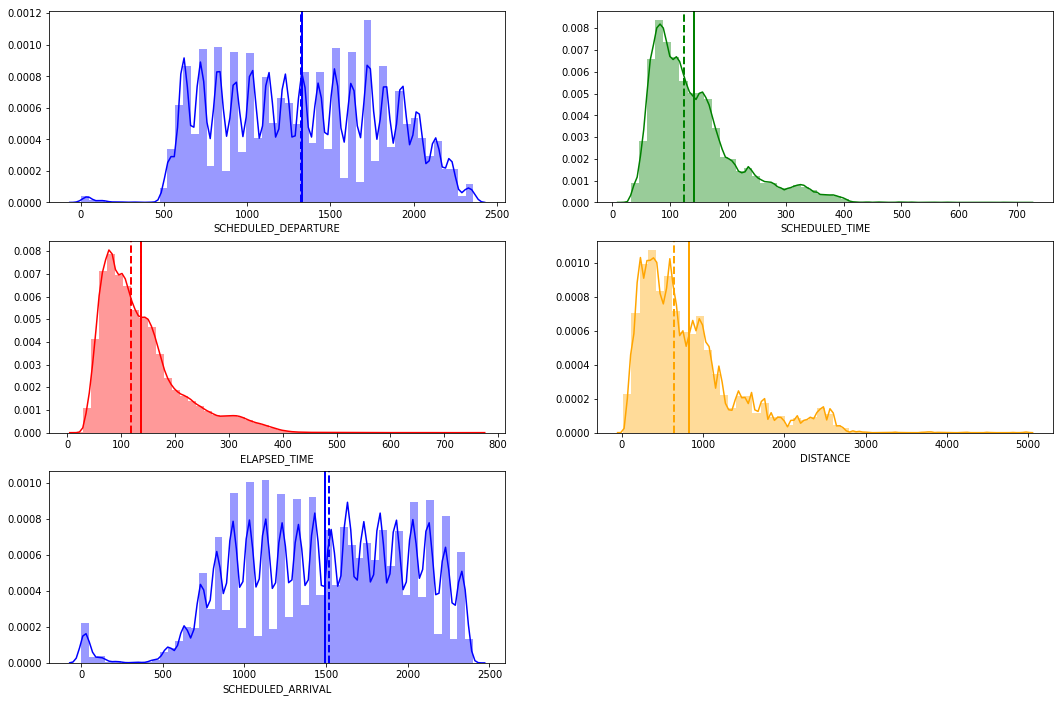

In [7]:
# general flight quantitative variable distributions
flight_quant_features = ['SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'ELAPSED_TIME',
                     'DISTANCE', 'SCHEDULED_ARRIVAL']
plot_quant_features(flights, flight_quant_features)

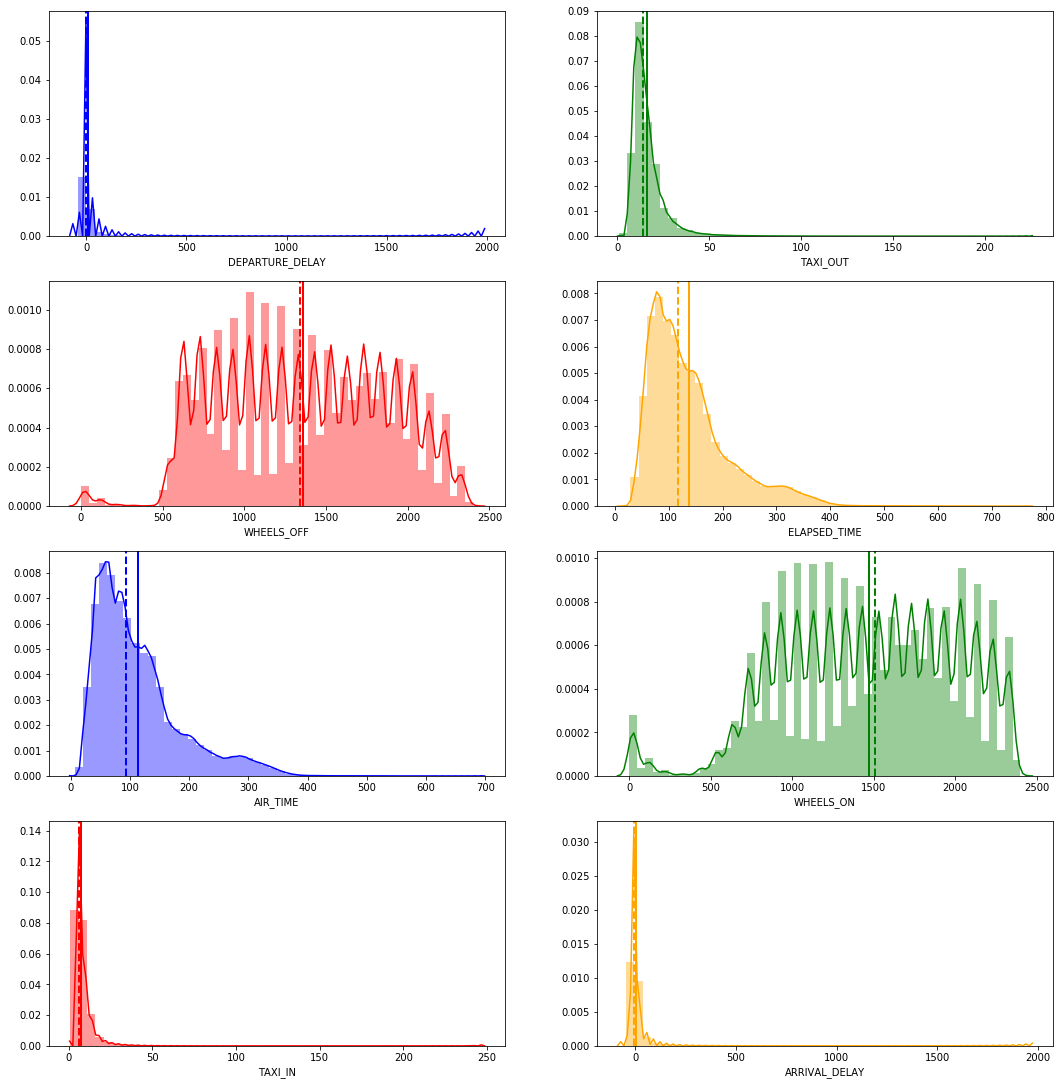

In [8]:
# delay quantitative variable distributions
delay_quant_features = ['DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME',
                     'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_DELAY']
plot_quant_features(flights, delay_quant_features)

In [9]:
# What cancellations are most common?
flights.groupby('CANCELLATION_REASON')['AIRLINE'].count().to_frame().reset_index()

,CANCELLATION_REASON,AIRLINE
0,A,25262
1,B,48851
2,C,15749
3,D,22


We see that most common reasons for cancellations are category B, which is weather. Second reason is the airlines themselves, which is category A, followed by the category C, which is the air traffic control. The final category D, security based cancellations, are very rare.

In [408]:
# what delays are most common?
delay_times_features = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
         'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
delays = flights[delay_times_features].sum().to_frame().reset_index()
delays = delays.rename(columns={0:'Minutes'})
delays = delays.sort_values('Minutes', ascending=False)
delays['percentage'] = delays['Minutes']/delays['Minutes'].sum()*100
delays

,index,Minutes,percentage
3,LATE_AIRCRAFT_DELAY,24961931.0,39.842278
2,AIRLINE_DELAY,20172956.0,32.198491
0,AIR_SYSTEM_DELAY,14335762.0,22.881620
4,WEATHER_DELAY,3100233.0,4.948349
1,SECURITY_DELAY,80985.0,0.129262


Most delay minutes occur due to late aircraft, which means the aircraft itself came late to the airport for the flight. This is due to delay from previous flight, which can be due to all the other delay reasons. Second to this, the most other minutes are delayed due to the airline, followed by the air system (air traffic control, airport, etc), and weather. 

It is interesting to note that while weather was the most commonly listed reason for cancelled flights, in terms of the total minutes of delay it is also the smallest. 

## Delays as function of time

In this analysis, we look at how delays change over different time scales. First, we look throughout the year by week and then average over each day of the week. 

In [331]:
# get dates feature
flights['date'] = pd.to_datetime((flights['YEAR']*10000+flights['MONTH']*100+flights['DAY']).apply(str),format='%Y%m%d')

In [402]:
# group delay times by each day and average per number of flights that day
delays = flights.groupby('date')[delay_times_features].agg(['sum', 'count']).reset_index()
for delay_type in delay_times_features:
    delays[delay_type + '_per_flight'] = delays[delay_type]['sum']/delays[delay_type]['count']
    # time average over a week to reduce noise
    delays[delay_type + '_per_flight_7day_avg'] = delays[delay_type + '_per_flight'].rolling(7).mean()
delays['total_flights'] = delays['AIRLINE_DELAY']['count']

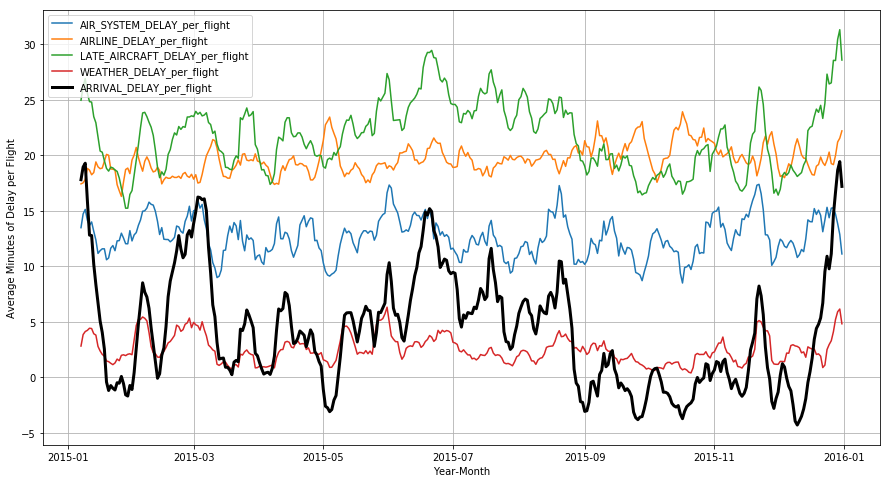

In [404]:
# plot delays over time
airline_delay_perflight = ['AIRLINE_DELAY_per_flight']
delay_times_perflight = ['AIR_SYSTEM_DELAY_per_flight',
                        'AIRLINE_DELAY_per_flight', 'LATE_AIRCRAFT_DELAY_per_flight',
                        'WEATHER_DELAY_per_flight', 'ARRIVAL_DELAY_per_flight']

fig, axs = plt.subplots(figsize=(15, 8))
axs = sns.lineplot(x="date", y='AIR_SYSTEM_DELAY_per_flight_7day_avg', data=delays)
# axs = sns.lineplot(x="date", y='SECURITY_DELAY_per_flight_7day_avg', data=delays)
axs = sns.lineplot(x="date", y='AIRLINE_DELAY_per_flight_7day_avg', data=delays)
axs = sns.lineplot(x="date", y='LATE_AIRCRAFT_DELAY_per_flight_7day_avg', data=delays)
axs = sns.lineplot(x="date", y='WEATHER_DELAY_per_flight_7day_avg', data=delays)
axs = sns.lineplot(x="date", y='ARRIVAL_DELAY_per_flight_7day_avg', data=delays, color='black', lw=3)
plt.legend(delay_times_perflight)
plt.grid() 
plt.xlabel('Year-Month')
plt.ylabel('Average Minutes of Delay per Flight')

plt.savefig(IMAGE_PATH + 'delays_over_time.png')

<Figure size 432x288 with 0 Axes>

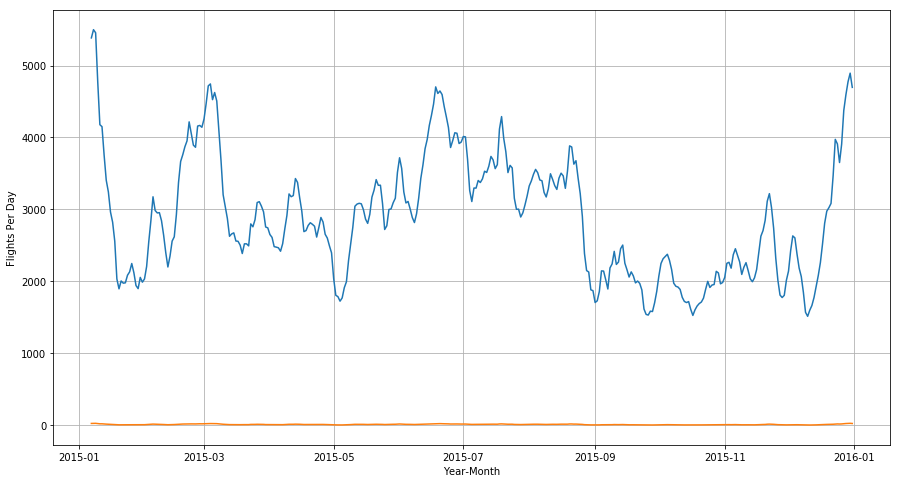

<Figure size 432x288 with 0 Axes>

In [363]:
# plot number of flights over time
delays['n_flights'] = delays['AIR_SYSTEM_DELAY']['count'].rolling(7).mean()
# delays['n_flights_per_flight_7day_avg'] = delays[delay_type + '_per_flight'].rolling(7).mean()
# plot delays over time
fig, axs = plt.subplots(figsize=(15, 8))
axs = sns.lineplot(x="date", y='n_flights', data=delays)
axs = sns.lineplot(x="date", y='ARRIVAL_DELAY_per_flight_7day_avg', data=delays)
plt.grid()
plt.xlabel('Year-Month')
plt.ylabel('Flights Per Day')
plt.figure()

The overall delay seems to follow the total number of flights almost exactly.

Now let's look at delays as a function of day of the week. We know virtually every time series data has seasonality in relation to a working week. 

In [15]:
# group by day of the week
weekly_delays = flights.groupby('DAY_OF_WEEK') \
    [delay_times_features].agg(['count', 'sum']).reset_index()
    
for delay_type in delay_times_features:
    weekly_delays[delay_type + '_per_flight'] = \
        weekly_delays[delay_type]['sum'] / weekly_delays[delay_type]['count']
        
weekly_delays['total_flights'] = weekly_delays['AIRLINE_DELAY']['count']

weekday_mapping = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',
                  5:'Friday', 6:'Saturday', 7:'Sunday'}
weekly_delays['DAY_OF_WEEK'] = weekly_delays['DAY_OF_WEEK'].map(weekday_mapping)

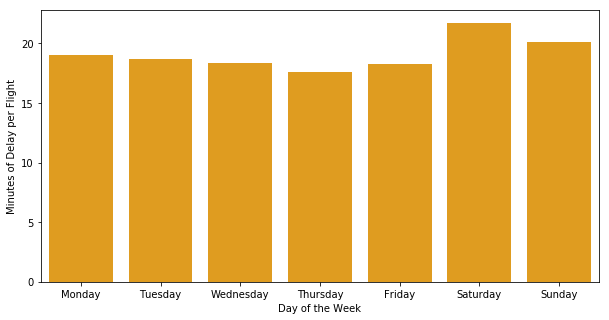

In [405]:
fig, axs = plt.subplots(figsize=(10, 5))
axs = sns.barplot(x="DAY_OF_WEEK", y='AIRLINE_DELAY_per_flight',
                  data=weekly_delays, color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Minutes of Delay per Flight')

plt.savefig(IMAGE_PATH + 'day_of_week.png')

## Most delayed airports

Now we find the most delayed airports in United States. Because some airports have more flights, the data needs to be normalized to the number of flights out of the airport for 2015. Also, because there are both origin airport, destination airport, and also airpor where the aircraft for the flight is coming from, the analysis be done differently for each airport. 

1. Origin Airport Delays: `DEPARTURE_DELAY` and `AIR_SYSTEM_DELAY`
2. Destination Airport Delays: `AIR_SYSTEM_DELAY`
3. Air Route Delays: `AIR_SYSTEM_DELAY` 

### 1. Most Delayed Origin Airports

In [364]:
# group by origin airport and sum delay minutes
origin_airport_delays = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].agg(['count', 'sum']).reset_index()
origin_airport_delays = origin_airport_delays[origin_airport_delays['count'] > 1000]

# normalize to per flight delay minutes
origin_airport_delays['DEPARTURE_DELAY' + '_per_flight'] = \
        origin_airport_delays['sum'] / origin_airport_delays['count']

# sort by delay and join with airport names 
origin_airport_delays = origin_airport_delays.merge(right=airports,
                                                    left_on='ORIGIN_AIRPORT',
                                                    right_on='IATA_CODE')
origin_airport_delays = origin_airport_delays.sort_values(by='DEPARTURE_DELAY_per_flight',
                                                          ascending=False)
        
# check results
print(origin_airport_delays.shape)
origin_airport_delays[['AIRPORT', 'DEPARTURE_DELAY_per_flight']].head(10)

(224, 11)


,AIRPORT,DEPARTURE_DELAY_per_flight
11,Aspen-Pitkin County Airport,17.587538
66,Eagle County Regional Airport,15.744398
47,Columbia Regional Airport,14.735789
215,Trenton Mercer Airport,14.440374
163,Chicago O'Hare International Airport,14.151375
71,Newark Liberty International Airport,13.638100
33,Baltimore-Washington International Airport,13.341158
125,LaGuardia Airport (Marine Air Terminal),13.231398
137,Chicago Midway International Airport,12.860676
38,Charlottesville-Albemarle Airport,12.777830


In [365]:
# group by origin airport and sum delay minutes
origin_airport_delays = flights.groupby('ORIGIN_AIRPORT')['AIR_SYSTEM_DELAY'].agg(['count', 'sum']).reset_index()
origin_airport_delays = origin_airport_delays[origin_airport_delays['count'] > 100]

# normalize to per flight delay minutes
origin_airport_delays['AIR_SYSTEM_DELAY' + '_per_flight'] = \
        origin_airport_delays['sum'] / origin_airport_delays['count']

# sort by delay and join with airport names 
origin_airport_delays = origin_airport_delays.merge(right=airports,
                                                    left_on='ORIGIN_AIRPORT',
                                                    right_on='IATA_CODE')
origin_airport_delays = origin_airport_delays.sort_values(by='AIR_SYSTEM_DELAY_per_flight',
                                                          ascending=False)
        
# check results
print(origin_airport_delays.shape)
origin_airport_delays[['AIRPORT', 'AIR_SYSTEM_DELAY_per_flight']].head(10)

(270, 11)


,AIRPORT,AIR_SYSTEM_DELAY_per_flight
251,Sioux Gateway Airport,30.854701
37,Burlington International Airport,30.395082
63,Central Wisconsin Airport,30.074890
114,Helena Regional Airport,27.676471
81,Erie International Airport,27.388060
255,Toledo Express Airport,27.147887
144,Arnold Palmer Regional Airport,26.602007
208,Portland International Jetport,26.539642
47,Charleston International Airport/Charleston AFB,23.997926
83,Evansville Regional Airport,23.699461


### 2. Most Delayed Destination Airports

In [367]:
# group by origin airport and sum delay minutes
dest_airport_delays = flights.groupby('DESTINATION_AIRPORT') \
    ['AIR_SYSTEM_DELAY'].agg(['count', 'sum']).reset_index()
dest_airport_delays = dest_airport_delays[dest_airport_delays['count'] > 1000]

# normalize to per flight delay minutes
dest_airport_delays['AIR_SYSTEM_DELAY' + '_per_flight'] = \
        dest_airport_delays['sum'] / dest_airport_delays['count']

# sort by delay and join with airport names 
dest_airport_delays = dest_airport_delays.merge(right=airports,
                                                    left_on='DESTINATION_AIRPORT',
                                                    right_on='IATA_CODE')
dest_airport_delays = dest_airport_delays.sort_values(by='AIR_SYSTEM_DELAY_per_flight',
                                                          ascending=False)
        
# check results
print(dest_airport_delays.shape)
dest_airport_delays[['AIRPORT', 'AIR_SYSTEM_DELAY_per_flight', 'STATE']].head(10)

(112, 11)


,AIRPORT,AIR_SYSTEM_DELAY_per_flight,STATE
51,John F. Kennedy International Airport (New Yor...,28.681531,NY
56,LaGuardia Airport (Marine Air Terminal),28.245417,NY
33,Newark Liberty International Airport,26.147250,NJ
76,Chicago O'Hare International Airport,24.451798,IL
97,San Francisco International Airport,23.408289,CA
80,Philadelphia International Airport,19.952829,PA
46,George Bush Intercontinental Airport,17.601715,TX
27,Ronald Reagan Washington National Airport,15.129499,VA
10,Gen. Edward Lawrence Logan International Airport,15.049001,MA
54,Los Angeles International Airport,14.795917,CA


### 3. Most Delayed Routes

In [378]:
# group by origin and destination airports
route_delays = flights.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT']) \
    ['AIR_SYSTEM_DELAY'].agg(['count', 'sum']).reset_index()
route_delays = route_delays[route_delays['count'] > 100]
    
# normalize to per flight delay minutes
route_delays['AIR_SYSTEM_DELAY' + '_per_flight'] = \
        route_delays['sum'] / route_delays['count']
    
# sort by delay and join with airport names 
route_delays = route_delays.merge(right=airports,
                                left_on='ORIGIN_AIRPORT',
                                right_on='IATA_CODE')
route_delays = route_delays.merge(right=airports,
                                left_on='DESTINATION_AIRPORT',
                                right_on='IATA_CODE')
route_delays = route_delays.sort_values(by='AIR_SYSTEM_DELAY_per_flight',
                                ascending=False)
route_delays = route_delays.rename(columns={'AIRPORT_x':'ORIGIN_AIRPORT_NAME', 'AIRPORT_y':'DESTINATION_AIRPORT_NAME'})
# check results
print(route_delays.shape)
route_delays[['ORIGIN_AIRPORT_NAME', 'DESTINATION_AIRPORT_NAME', 'AIR_SYSTEM_DELAY_per_flight']].head(10)

(2604, 19)


,ORIGIN_AIRPORT_NAME,DESTINATION_AIRPORT_NAME,AIR_SYSTEM_DELAY_per_flight
972,Tucson International Airport,San Francisco International Airport,47.577381
1523,Cleveland Hopkins International Airport,Newark Liberty International Airport,46.154545
1705,Portland International Jetport,John F. Kennedy International Airport (New Yor...,45.551724
1546,Manchester-Boston Regional Airport,Newark Liberty International Airport,44.674847
1545,Memphis International Airport,Newark Liberty International Airport,44.532995
1522,Charleston International Airport/Charleston AFB,Newark Liberty International Airport,42.554688
1520,Burlington International Airport,Newark Liberty International Airport,42.486842
1556,Theodore Francis Green State Airport,Newark Liberty International Airport,40.834951
1559,Richmond International Airport,Newark Liberty International Airport,40.239437
1558,Raleigh-Durham International Airport,Newark Liberty International Airport,40.009569


In [409]:
route_delays = route_delays.sort_values(by='AIR_SYSTEM_DELAY_per_flight',
                                ascending=True)
route_delays[['ORIGIN_AIRPORT_NAME', 'DESTINATION_AIRPORT_NAME', 'AIR_SYSTEM_DELAY_per_flight']].head(10)

,ORIGIN_AIRPORT_NAME,DESTINATION_AIRPORT_NAME,AIR_SYSTEM_DELAY_per_flight
2429,Sacramento International Airport,Honolulu International Airport,0.000000
2418,McCarran International Airport,Honolulu International Airport,0.000000
2556,Honolulu International Airport,Hilo International Airport,0.451531
2561,Honolulu International Airport,Lihue Airport,0.459391
2557,Honolulu International Airport,Kona International Airport at Keahole,0.627083
2563,Kahului Airport,Lihue Airport,0.662651
2523,Honolulu International Airport,Kahului Airport,0.675342
2416,Hilo International Airport,Honolulu International Airport,0.739659
2525,Lihue Airport,Kahului Airport,0.778761
2417,Kona International Airport at Keahole,Honolulu International Airport,0.780864


## Most delayed airlines

Here we do a similar analysis to find the most delayed airlines. Again, we normalize for the number of flights each airline had in 2015. When looking at most delayed airlines, there's several ways to define **delay**:

* **Delay due to the airline**: `AIRLINE_DELAY` feature, this is the delay due to the fault of the airline


* **Overall delay**: `ARRIVAL_DELAY` feature, this is the overall delay of a flight, due to all factors including that of the airline


In addition, we can look at a subset of flights based on the delays. For example, some flights are likely slightly early and offset the delay average per flight for an airline. So we can look at the data in following way:

* **All flights**: look at average delay per flight for all flights in the dataset


* **Delayed flights only**: look at average delay per flight for flights that were delayed only, `ARRIVAL_DELAY` > 0


* **Very delayed flights only**: look at average delay per flight for flights that had long delays only, for example: `ARRIVAL_DELAY` > 60 (flights that were delayed by an hour or more) 

In [22]:
# This function calculates the average delay time in minutes per flight for each airline
def get_airline_delays(flights, airlines, delay_times_features, delay_limit=None):
    '''
    Inputs
        flights = pandas dataframe of flights
        airlines = pandas dataframe of airlines
        delay_times_features = list of features to average (various delay times)
        delay_limit = 'ARRIVAL_DELAY' feature threshold, must be greater to count towards average
    Outputs
        airline_delays = pandas dataframe of each airline both in flights and airlines table
                            and their average delay time for each category
    '''
    # get average of all flights, including ones on time or early
    if delay_limit is None:
        airline_delays = flights.groupby('AIRLINE')[delay_times_features].mean().reset_index()
        counts = flights.groupby('AIRLINE')['AIRLINE'].count().to_frame()
        counts = counts.rename(columns={'AIRLINE':'n_flights'}).reset_index()
        airline_delays = pd.concat([airline_delays, counts['n_flights']], axis=1)
    # get average of subselection of flights based on their arrival delay
    else:
        flights = flights[flights['ARRIVAL_DELAY'] > delay_limit]
        airline_delays = flights.groupby('AIRLINE')[delay_times_features].mean().reset_index()
        counts = flights.groupby('AIRLINE')['AIRLINE'].count().to_frame()
        counts = counts.rename(columns={'AIRLINE':'n_flights'}).reset_index()
        airline_delays = pd.concat([airline_delays, counts['n_flights']], axis=1)
    # rename columns and merge with airlines     
    airline_delays = airlines.merge(right=airline_delays, how='inner',
                                    left_on='IATA_CODE', right_on='AIRLINE')
    airline_delays = airline_delays.rename(columns={'AIRLINE_x':'AIRLINE_NAME'})
    airline_delays = airline_delays[['AIRLINE_NAME', 'IATA_CODE', 'n_flights'] + delay_times_features]
    return airline_delays

### Most delayed airlines due to their own fault

For this analysis, we look at average delay times for `AIRLINE_DELAY` feature, which is due to the fault of the airline. 

In [301]:
airline_delays_airline_all.sort_values(by='n_flights', ascending=False)

,AIRLINE_NAME,IATA_CODE,n_flights,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY
8,Southwest Airlines Co.,WN,1261855,7.054161,0.050240,16.191674,26.681590,2.304772,4.374964
9,Delta Air Lines Inc.,DL,875881,15.076578,0.033129,22.941028,18.099252,5.108335,0.186754
1,American Airlines Inc.,AA,725984,13.513774,0.124026,21.139201,21.747956,3.587838,3.451372
5,Skywest Airlines Inc.,OO,588353,12.375082,0.091804,18.959163,26.612403,2.322232,5.845652
10,Atlantic Southeast Airlines,EV,571977,15.459170,0.000000,21.651277,24.078400,1.550713,6.585379
0,United Air Lines Inc.,UA,515723,14.422681,0.012462,21.144678,26.019098,3.103875,5.431594
12,American Eagle Airlines Inc.,MQ,294632,15.372752,0.116422,17.425025,23.404512,6.644508,6.457873
4,JetBlue Airways,B6,267048,16.754728,0.192936,18.150503,23.954305,1.956401,6.677861
2,US Airways Inc.,US,198715,16.470027,0.168623,17.410107,14.311199,1.930477,3.706209
6,Alaska Airlines Inc.,AS,172521,13.487742,0.260603,15.543352,17.064111,1.737294,-0.976563


In [298]:
sorting_col = 'AIRLINE_DELAY'

# for all flights
airline_delays_airline_all = get_airline_delays(flights, airlines, delay_times_features) \
    .sort_values(by=sorting_col, ascending=False)
# for delayed flights only
airline_delays_airline_delay = get_airline_delays(flights, airlines, delay_times_features, 0) \
    .sort_values(by=sorting_col, ascending=False)
# for very delayed flights only (> 1hr or more)
airline_delays_airline_longdelay = get_airline_delays(flights, airlines, delay_times_features, 60) \
    .sort_values(by=sorting_col, ascending=False)

In [24]:
airline_delays_airline_all[['AIRLINE_NAME','AIRLINE_DELAY']].head()

,AIRLINE_NAME,AIRLINE_DELAY
9,Delta Air Lines Inc.,22.941028
11,Hawaiian Airlines Inc.,22.792063
10,Atlantic Southeast Airlines,21.651277
0,United Air Lines Inc.,21.144678
1,American Airlines Inc.,21.139201


In [25]:
airline_delays_airline_delay[['AIRLINE_NAME','AIRLINE_DELAY']].head()

,AIRLINE_NAME,AIRLINE_DELAY
9,Delta Air Lines Inc.,22.941028
11,Hawaiian Airlines Inc.,22.792063
10,Atlantic Southeast Airlines,21.651277
0,United Air Lines Inc.,21.144678
1,American Airlines Inc.,21.139201


In [26]:
airline_delays_airline_longdelay[['AIRLINE_NAME','AIRLINE_DELAY']].head()

,AIRLINE_NAME,AIRLINE_DELAY
11,Hawaiian Airlines Inc.,83.997232
9,Delta Air Lines Inc.,55.532704
10,Atlantic Southeast Airlines,49.043262
1,American Airlines Inc.,48.033413
5,Skywest Airlines Inc.,44.150218


### Most delayed airline in general (all delays)

This is what a passenger experiences for a flight. This shows airlines on-time performance per flight with all delays combined, which is simply actual arrival time - scheduled arrival time. 

In [27]:
sorting_col = 'ARRIVAL_DELAY'

# for all flights
airline_delays_airline_all = get_airline_delays(flights, airlines, delay_times_features) \
    .sort_values(by=sorting_col, ascending=False)
# for delayed flights only
airline_delays_airline_delay = get_airline_delays(flights, airlines, delay_times_features, 0) \
    .sort_values(by=sorting_col, ascending=False)
# for very delayed flights only (> 1hr or more)
airline_delays_airline_longdelay = get_airline_delays(flights, airlines, delay_times_features, 60) \
    .sort_values(by=sorting_col, ascending=False)

In [28]:
airline_delays_airline_all[['AIRLINE_NAME','ARRIVAL_DELAY']].head()

,AIRLINE_NAME,ARRIVAL_DELAY
7,Spirit Air Lines,14.471800
3,Frontier Airlines Inc.,12.504706
4,JetBlue Airways,6.677861
10,Atlantic Southeast Airlines,6.585379
12,American Eagle Airlines Inc.,6.457873


In [29]:
airline_delays_airline_delay[['AIRLINE_NAME','ARRIVAL_DELAY']].head()

,AIRLINE_NAME,ARRIVAL_DELAY
3,Frontier Airlines Inc.,41.190435
7,Spirit Air Lines,40.659852
12,American Eagle Airlines Inc.,39.509202
0,United Air Lines Inc.,39.209314
4,JetBlue Airways,38.132807


In [30]:
airline_delays_airline_longdelay[['AIRLINE_NAME','ARRIVAL_DELAY']].head()

,AIRLINE_NAME,ARRIVAL_DELAY
9,Delta Air Lines Inc.,137.401250
3,Frontier Airlines Inc.,137.054378
1,American Airlines Inc.,132.057156
11,Hawaiian Airlines Inc.,131.266605
0,United Air Lines Inc.,128.834287


### Visualization

In [249]:
# get airlines
airline_delays = get_airline_delays(flights, airlines, delay_times_features)

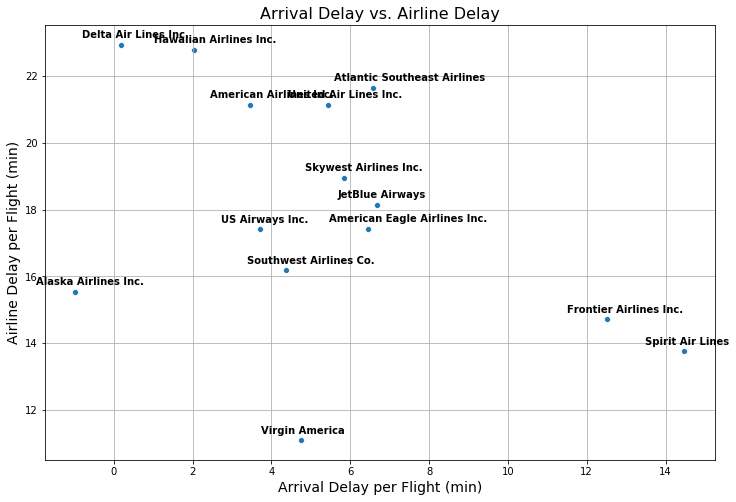

In [386]:
# figure and plot
fig, axs = plt.subplots(figsize=(12, 8))
axs = sns.scatterplot('ARRIVAL_DELAY', 'AIRLINE_DELAY', data=airline_delays)
plt.grid()
plt.xlabel('Arrival Delay per Flight (min)', fontsize=14)
plt.ylabel('Airline Delay per Flight (min)', fontsize=14)
plt.title('Arrival Delay vs. Airline Delay', fontsize=16)
# add annotations one by one with a loop
airline_names = airline_delays['AIRLINE_NAME'].unique()
for line in range(0,airline_delays.shape[0]):
    axs.text(airline_delays['ARRIVAL_DELAY'][line]-1, airline_delays['AIRLINE_DELAY'][line]+0.2, airline_names[line], 
            horizontalalignment='left', size='medium', color='black', weight='semibold')
    
plt.savefig(IMAGE_PATH + 'airline_clustering.png')

In [415]:
# get average distance of each airline
avg_dist = flights.groupby('AIRLINE')['DISTANCE'].mean().to_frame().reset_index().sort_values('DISTANCE', ascending=False)
avg_dist = avg_dist.merge(airlines, how='outer', left_on='AIRLINE', right_on='IATA_CODE')
avg_dist[['AIRLINE_y','DISTANCE']]

,AIRLINE_y,DISTANCE
0,Virgin America,1405.989322
1,United Air Lines Inc.,1271.545684
2,Alaska Airlines Inc.,1197.418082
3,JetBlue Airways,1062.175178
4,American Airlines Inc.,1041.339222
5,Spirit Air Lines,985.267118
6,Frontier Airlines Inc.,967.214860
7,US Airways Inc.,911.503862
8,Delta Air Lines Inc.,853.621825
9,Southwest Airlines Co.,740.711335


## Twitter sentiment analysis

In [293]:
# map airline codes to tweets table
airline_codes = {'Virgin America':'VX', 'United':'UA', 'Southwest':'WN', 
                 'Delta':'DL', 'US Airways':'US', 'American':'AA'}
tweets['IATA_CODE'] = tweets['airline'].map(airline_codes)
print(tweets.shape)
tweets.iloc[25].to_frame().reset_index()

(14640, 16)


,index,25
0,tweet_id,570249102404923392
1,airline_sentiment,negative
2,airline_sentiment_confidence,1
3,negativereason,Customer Service Issue
4,negativereason_confidence,1
5,airline,Virgin America
6,airline_sentiment_gold,NaN
7,name,Leora13
8,negativereason_gold,NaN
9,retweet_count,0


In [147]:
# groupby airline and get counts of airline_sentiment
sent = tweets.groupby(['IATA_CODE','airline_sentiment'])['tweet_id'].count().to_frame()
sent = sent.unstack(1).reset_index()
sent.columns = sent.columns.droplevel()
sent = sent.rename(columns={'':'IATA_CODE'})

# get NPS for each airlines
sent['total'] = sent['positive'] + sent['neutral'] + sent['negative']
sent['NPS'] = (sent['positive']/sent['total'] - sent['negative']/sent['total'])*100
sent = sent.sort_values('NPS', ascending=True)
sent

airline_sentiment,IATA_CODE,negative,neutral,positive,total,NPS
3,US,2263,381,269,2913,-68.451768
0,AA,1960,463,336,2759,-58.861906
2,UA,2633,697,492,3822,-56.017792
5,WN,1186,664,570,2420,-25.454545
1,DL,955,723,544,2222,-18.496850
4,VX,181,171,152,504,-5.753968


We see that during month of February, US Airways, American, and United had the worst NPS. How does this compare to delays data during the same month for each airline?

In [33]:
# get flights in February only
flights_feb = flights[flights['MONTH'] == 2]
flights_feb.shape

(429191, 32)

In [148]:
sorting_col = 'AIRLINE_DELAY'

# for all flights
airline_delays_feb = get_airline_delays(flights_feb, airlines, delay_times_features) \
    .sort_values(by=sorting_col, ascending=False)  
# for very late flights
airline_delays_feb_verylate = get_airline_delays(flights_feb, airlines, delay_times_features,  ) \
    .sort_values(by=sorting_col, ascending=False) 

In [149]:
sorting_col = 'ARRIVAL_DELAY'

# for all flights
arrival_delays_feb_all = get_airline_delays(flights_feb, airlines, delay_times_features) \
    .sort_values(by=sorting_col, ascending=False) 
arrival_delays_feb_late = get_airline_delays(flights_feb, airlines, delay_times_features, 0) \
    .sort_values(by=sorting_col, ascending=False) 
arrival_delays_feb_verylate = get_airline_delays(flights_feb, airlines, delay_times_features, 120) \
    .sort_values(by=sorting_col, ascending=False)     

In [150]:
# merge with NPS from tweets
sent = sent.merge(airline_delays_feb[['IATA_CODE', 'AIRLINE_DELAY']], how='inner', on='IATA_CODE')
sent = sent.rename(columns={'AIRLINE_DELAY':'AIRLINE_DELAY (ALL FLIGHTS)'})
sent = sent.merge(airline_delays_feb_verylate[['IATA_CODE', 'AIRLINE_DELAY']], how='inner', on='IATA_CODE')
sent = sent.rename(columns={'AIRLINE_DELAY':'AIRLINE_DELAY (VERY LATE FLIGHTS)'})
sent = sent.merge(arrival_delays_feb_all[['IATA_CODE', 'ARRIVAL_DELAY']], how='inner', on='IATA_CODE')
sent = sent.rename(columns={'ARRIVAL_DELAY':'ARRIVAL_DELAY (ALL FLIGHTS)'})
sent = sent.merge(arrival_delays_feb_late[['IATA_CODE', 'ARRIVAL_DELAY']], how='inner', on='IATA_CODE')
sent = sent.rename(columns={'ARRIVAL_DELAY':'ARRIVAL_DELAY (LATE FLIGHTS)'})
# merge with airline names
sent = sent.merge(airlines, how='inner', on='IATA_CODE')
sent

,IATA_CODE,negative,neutral,positive,total,NPS,AIRLINE_DELAY (ALL FLIGHTS),AIRLINE_DELAY (VERY LATE FLIGHTS),ARRIVAL_DELAY (ALL FLIGHTS),ARRIVAL_DELAY (LATE FLIGHTS),AIRLINE
0,US,2263,381,269,2913,-68.451768,18.599939,73.417085,7.114455,31.206264,US Airways Inc.
1,AA,1960,463,336,2759,-58.861906,20.998107,85.273637,7.530204,36.019671,American Airlines Inc.
2,UA,2633,697,492,3822,-56.017792,19.222942,62.861361,7.260662,33.682811,United Air Lines Inc.
3,WN,1186,664,570,2420,-25.454545,15.148159,67.735465,3.501363,27.098618,Southwest Airlines Co.
4,DL,955,723,544,2222,-18.496850,22.006560,81.787962,5.614745,37.771699,Delta Air Lines Inc.
5,VX,181,171,152,504,-5.753968,10.890346,23.210938,7.784410,39.272614,Virgin America


In [251]:
def plot_delays_and_sentiments(sent, delay_column):
    # figure and plot
    fig, axs = plt.subplots(figsize=(10, 7))
    axs = sns.regplot(delay_column, "NPS", data=sent)
    plt.grid()
    plt.xlabel('Minutes Delay Per Flight')
    plt.ylabel('Twitter Sentiment NPS')
    plt.ylim([-100, 50])
    plt.title(delay_column + ' vs. Twitter Sentiment in February 2015')
    # add annotations one by one with a loop
    airline_labels = sent['AIRLINE'].unique()
    for line in range(0,sent.shape[0]):
         axs.text(sent[delay_column][line], sent['NPS'][line]+3.5, airline_labels[line], 
                 horizontalalignment='left', size='medium', color='black', weight='semibold')
    # calculate pearson correlation coefficient
    pc, p_val = pearsonr(sent[delay_column], sent['NPS'])
    x_pos = np.max(sent[delay_column])
    axs.text(0.7*x_pos, 40, 'Pearson Coefficient: {}'.format(round(pc, 3)), fontsize=14, weight='semibold')
    axs.text(0.7*x_pos, 30, 'P-Value: {}'.format(round(p_val, 3)), fontsize=14, weight='semibold')

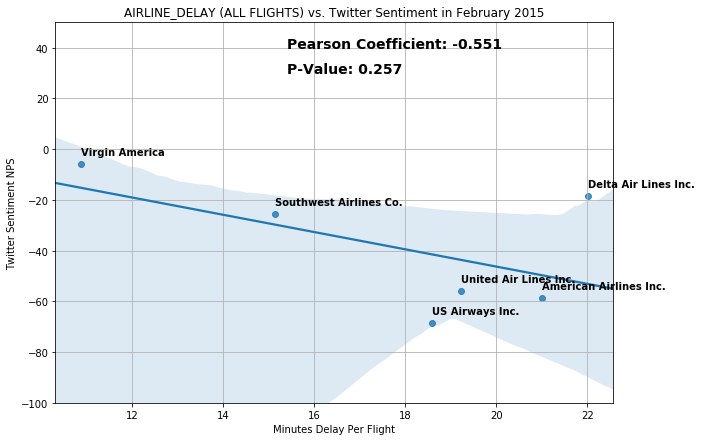

In [384]:
plot_delays_and_sentiments(sent, 'AIRLINE_DELAY (ALL FLIGHTS)')
plt.savefig(IMAGE_PATH + 'twitter_sentiment_airline_delay.png')

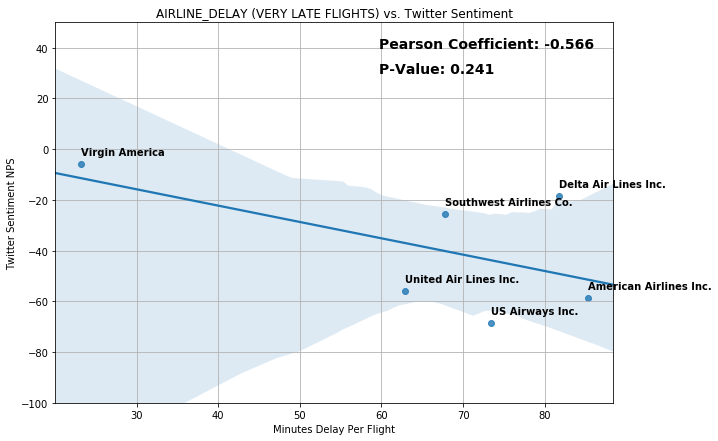

In [226]:
plot_delays_and_sentiments(sent, 'AIRLINE_DELAY (VERY LATE FLIGHTS)')

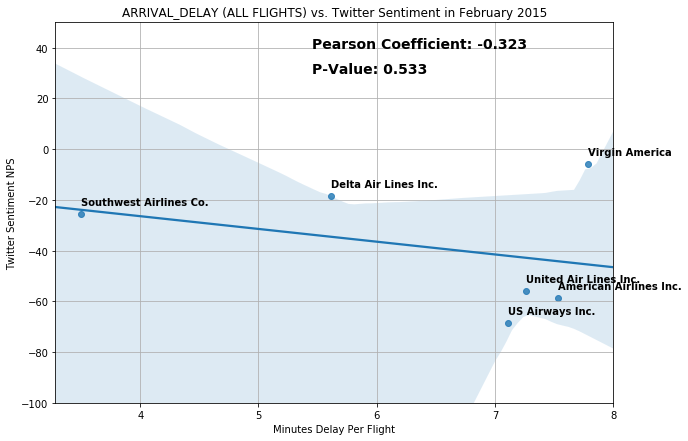

In [385]:
plot_delays_and_sentiments(sent, 'ARRIVAL_DELAY (ALL FLIGHTS)')
plt.savefig(IMAGE_PATH + 'twitter_sentiment_arrival_delay.png')

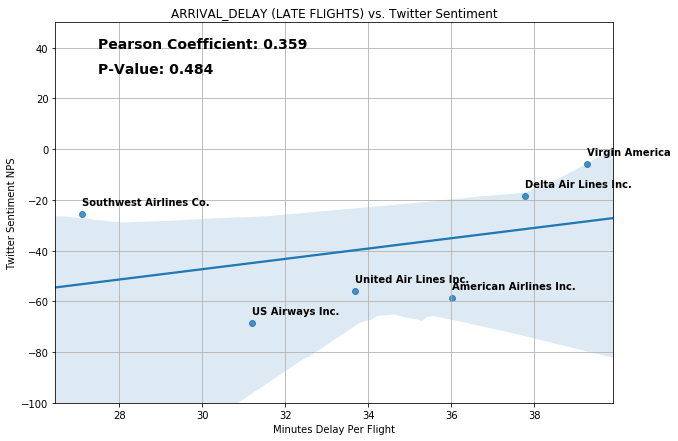

In [228]:
plot_delays_and_sentiments(sent, 'ARRIVAL_DELAY (LATE FLIGHTS)')

## Twitter negative tweet reason analysis

What are negative tweets compaining about? They fall into several categories:

In [127]:
reasons = tweets.groupby('negativereason')['tweet_id'].count().to_frame().reset_index()
reasons = reasons.rename(columns={'tweet_id':'number'})
reasons = reasons.sort_values('number', ascending=False)
reasons

,negativereason,number
3,Customer Service Issue,2910
7,Late Flight,1665
1,Can't Tell,1190
2,Cancelled Flight,847
8,Lost Luggage,724
0,Bad Flight,580
6,Flight Booking Problems,529
5,Flight Attendant Complaints,481
9,longlines,178
4,Damaged Luggage,74


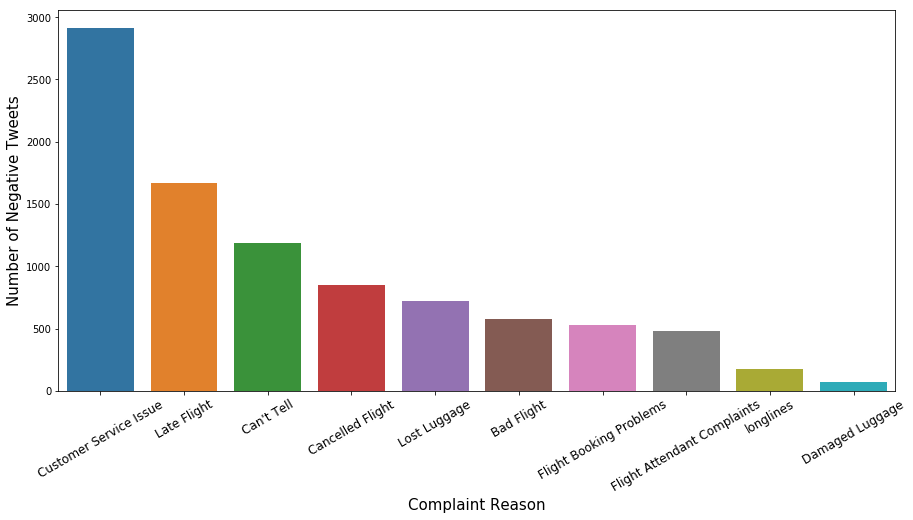

In [383]:
# plot complaint reasons
fig, axs = plt.subplots(figsize=(15, 7))
g = sns.barplot(reasons['negativereason'], reasons['number'])
g.set_xticklabels(labels=reasons['negativereason'], rotation=30, fontsize=12)
plt.ylabel('Number of Negative Tweets', fontsize=15)
plt.xlabel('Complaint Reason', fontsize=15)

# save figure
plt.savefig(IMAGE_PATH + 'negative_reasons.png')

We see that while customer service issue is the dominant complaint topic, late flights are the second most popular reason for negative tweet. 

In [315]:
# get late flight complaints only
late_comps = tweets[tweets['negativereason'] == 'Late Flight']
late_comps = late_comps.groupby('airline')['tweet_id'].count().to_frame().reset_index()
late_comps = late_comps.rename(columns={'tweet_id':'count'})
late_comps['AIRLINE'] = late_comps['airline'].map(airline_codes)
late_comps

,airline,count,AIRLINE
0,American,249,AA
1,Delta,269,DL
2,Southwest,152,WN
3,US Airways,453,US
4,United,525,UA
5,Virgin America,17,VX


Of course, airlines with more flights are more likely going to have more delays just due to the shear number of flights. So how does this compare with actual number of delayed flights due to the airline's fault?

In [316]:
# get flights more than 60 min late with airline accounting for more than half of the delay
flights_late = flights[(flights['ARRIVAL_DELAY'] > 60) & (flights['AIRLINE_DELAY'] >= 0.5*flights['ARRIVAL_DELAY'])]
flights_late = flights_late[flights_late['MONTH'] == 1]
flights_late.shape

(8024, 32)

In [317]:
# groupby to find late flights due to the fault of the airline and count them for each airline
late_flights = flights_late.groupby('AIRLINE')['FLIGHT_NUMBER'].count().to_frame()
late_flights = late_flights.rename(columns={'FLIGHT_NUMBER':'n_flights'})
late_flights = late_flights.reset_index()
late_flights.head()

,AIRLINE,n_flights
0,AA,857
1,AS,164
2,B6,361
3,DL,755
4,EV,1199


In [318]:
# join with tweet complaints
late_comps = late_comps.merge(right=late_flights, how='inner', on='AIRLINE')
late_comps

,airline,count,AIRLINE,n_flights
0,American,249,AA,857
1,Delta,269,DL,755
2,Southwest,152,WN,1122
3,US Airways,453,US,511
4,United,525,UA,726
5,Virgin America,17,VX,40


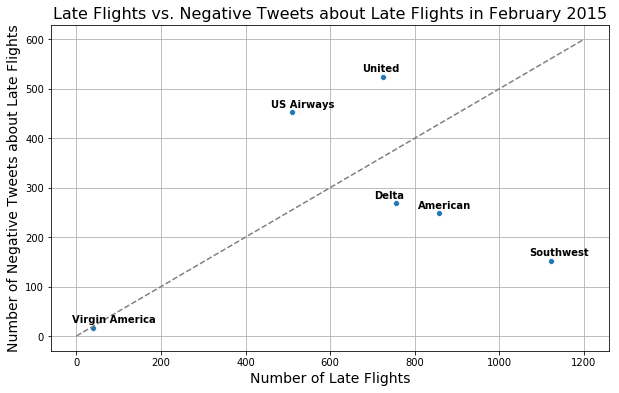

In [382]:
# plot results
fig, axs = plt.subplots(figsize=(10, 6))
axs = sns.scatterplot('n_flights', 'count', data=late_comps)
plt.grid()
plt.xlabel('Number of Late Flights', fontsize=14)
plt.ylabel('Number of Negative Tweets about Late Flights', fontsize=14)
# plt.ylim([-100, 50])
plt.title('Late Flights vs. Negative Tweets about Late Flights in February 2015', fontsize=16)
# add annotations one by one with a loop
airline_labels = late_comps['airline'].unique()
for line in range(0,sent.shape[0]):
    axs.text(late_comps['n_flights'][line]-50, late_comps['count'][line]+10, airline_labels[line],
             horizontalalignment='left', size='medium', color='black', weight='semibold')

# diagonal line
dl_x = [0, 1200]
dl_y = [0, 600]
plt.plot(dl_x, dl_y, color='gray',linestyle='--')
    
# save figure
plt.savefig(IMAGE_PATH + 'twitter_sentiment2.png')